In [23]:
#importing libraries & dataset
import re
import sklearn as preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

In [9]:
digit=load_digits()
x=digit.data
y=digit.target

In [10]:
x.shape,y.shape

((1797L, 64L), (1797L,))

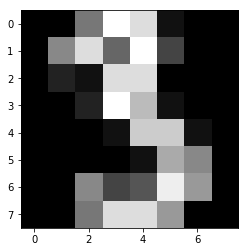

In [12]:
plt.imshow(x[3].reshape(8,8),cmap=plt.cm.gray)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [21]:
reg=LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
pred = reg.predict(x_test)


In [27]:
result = pd.DataFrame({"Predicted":pred,"Actual":y_test})
result

,Actual,Predicted
0,2,2
1,0,0
2,4,4
3,2,2
4,5,5
5,7,7
6,1,1
7,7,7
8,5,5
9,8,8


In [30]:
kfold= model_selection.KFold(n_splits=10,random_state=8)

In [31]:
results=model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='accuracy')
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [32]:
results.sum()/10

0.931530105524519

In [34]:
results=model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='neg_log_loss')
results

array([-0.45778991, -0.14434019, -0.61739005, -0.27333073, -0.27594791,
       -0.12824496, -0.11027347, -0.12335714, -0.62604368, -0.6855272 ])

In [35]:
results.sum()/10

-0.34422452331430986

In [37]:
#c
reg1 = LinearRegression()
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring='r2')
results

array([0.40105499, 0.63102463, 0.57072313, 0.59629035, 0.54519634,
       0.67174215, 0.61763556, 0.47611004, 0.4236549 , 0.41044286])

In [38]:
results.sum()/10

0.5343874961263954

In [40]:
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring='neg_mean_absolute_error')
results

array([-1.76232318, -1.33110792, -1.55360439, -1.51943658, -1.50040068,
       -1.30773649, -1.41940728, -1.60049753, -1.62693098, -1.75390435])

In [41]:
results.sum()/10

-1.5375349366952844

In [42]:
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring='neg_mean_squared_error')
results

array([-5.08763116, -2.93563178, -3.5440648 , -3.35720712, -3.61041109,
       -2.77252253, -3.06878144, -4.29164324, -4.76128221, -4.75789407])

In [43]:
results.sum()/10


-3.81870694491852

In [45]:
confusion_matrix(y_test,pred)

array([[64,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  1,  0,  0,  0,  0,  2,  2],
       [ 0,  1, 49,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  1,  0,  0],
       [ 0,  3,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  1,  0, 58,  2,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 49,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  3,  0, 60]], dtype=int64)

In [46]:
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       0.91      0.91      0.91        57
          2       0.98      0.96      0.97        51
          3       0.92      0.98      0.95        45
          4       1.00      0.92      0.96        48
          5       0.98      0.89      0.94        65
          6       0.96      0.98      0.97        49
          7       0.88      1.00      0.94        44
          8       0.92      0.94      0.93        52
          9       0.92      0.92      0.92        65

avg / total       0.95      0.95      0.95       540

